# Bayes Theorem

## Naming The Terms in The Theorem

#### The terms in the Bayes Theorem equation are given names depending on the context where the equation is used. It can be helpful to think about the calculation from these different perspectives and help to map your problem onto the equation. Firstly, in general the result P(A|B) is referred to as the posterior probability and P(A) is referred to as the prior probability.

- P(A|B): Posterior probability
- P(A): Prior probability

#### Sometimes P(B|A) is referred to as the likelihood and P(B) is referred to as the evidence.

- P(B|A): Likelihood.
- P(B): Evidence.

## This allows Bayes Theorem to be restated as:
 - Posterior = Likelihood × Prior / Evidence

#### We can make this clear with a Smoke and Fire example. What is the probability that there is fire given that there is smoke, where P(Fire) is the Prior, P(Smoke|Fire) is the Likelihood, and P(Smoke) is the evidence:

- P(Fire | Smoke) = P(Smoke | Fire) * P(Fire)  / P(Smoke)

#### We can also think about the calculation in the terms of a binary classifier. For example, P(B|A) may be referred to as the True Positive Rate (TPR) or the sensitivity, P(B|not A) may be referred to as the False Positive Rate (FPR), the complement P(not B|not A) may be referred to as the True Negative Rate (TNR) or specificity, and the value we are calculating P(A|B) may be referred to as the Positive Predictive Value (PPV) or the precision.

## Example: Elderly Fall and Death
#### Consider the case where an elderly person (over 80 years of age) falls, what is the probability that they will die from the fall? Let’s assume that the base rate of someone elderly dying P (A) is 10%, and the base rate for elderly people falling P(B) is 5%, and from all elderly people, 7% of those that die had a fall P(B|A). Let’s plug what we know into the theorem:

- P(Die From Fall | Elderly Person)
- P(A) = 10%
- P(B) = 5%
- P(B |A) = 7%
- P(Not A) = 90%
- P(Not B) = 95%

#### 7% * 10% / 5% = P( Fall | die) * p(die) / P(B)

In [1]:
# calculate the probability of an elderly person dying from a fall
# calculate P(A|B) given P(B|A), P(A) and P(B)
def bayes_theorem(p_a, p_b, p_b_given_a):
  # calculate P(A|B) = P(B|A) * P(A) / P(B)
  p_a_given_b = (p_b_given_a * p_a) / p_b
  return p_a_given_b
# P(A)
p_a = 0.10
# P(B)
p_b = 0.05
# P(B|A)
p_b_given_a = 0.07
# calculate P(A|B)
result = bayes_theorem(p_a, p_b, p_b_given_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 14.000%


## Example: Email and Spam Detection
#### Consider the case where we receive an email and the spam detector puts it in the spam folder, what is the probability it was spam? Let’s assume some details such as 2% of the email we receive is spam P(A). Let’s assume that the spam detector is really good and when an email is spam that it detects it P(B|A) with an accuracy of 99%, and when an email is not spam, it will mark it as spam with a very low rate of 0.1% P(B|not A). Let’s plug what we know into the theorem:

- P(Spam | Detected) = P(Detected | Spam) * P(Spam) / P(Detected)
- P(Spam | Dectected) = 0.99 * 0.02 / P(Detected)
- What is P(Detected) ? We can use the law of total probability to solve P(detected)
- P(Detected) = P(Detected | Spam) * P(Spam) + P(Detected| Not Spam) * P(Not Spam)
-  (0.99 * 0.02) + (0.91 * 0.01) = 0.02078

In [2]:

# calculate the probability of an email in the spam folder being spam
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
  # calculate P(not A)
  not_a = 1 - p_a
  # calculate P(B)
  p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
  # calculate P(A|B)
  p_a_given_b = (p_b_given_a * p_a) / p_b
  return p_a_given_b
# P(A)
p_a = 0.02
# P(B|A)
p_b_given_a = 0.99
# P(B|not A)
p_b_given_not_a = 0.001
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 95.284%


## Example: Liars and Lie Detectors
#### Consider the case where a person is tested with a lie detector and gets a positive result suggesting that they are lying, what is the probability that the person is indeed lying? Let’s assume some details, such as most people that are tested are telling the truth, such as 98%, meaning (1 − 0.98) or 2% are liars P(A). Let’s also assume that when someone is lying that the test can detect them well, but not great, such as 72% of the time P(B|A). Let’s also assume that when the machine says they are not lying, this is true 97% of the time P(not B| not A). Let’s plug what we know into the theorem:

- P(A) = 0.02
- P(B|A) = 0.72%
- P(Not B| Not A) = 0.97%
- Missing P(B)

- P(Lying | Positive) = (Positive | Lying) * P(Lying) / P(Positive)
- P(Positive) = (0.72 * 0.02) + P(Positive | Not lying) * p(Not Lying) = 0.98
- P(Positive | Not lying) = 1 - P(Not Positive | Not Lying) = 0.03%
-  (0.72 * 0.02) + ( 0.03) * p(Not Lying) = 0.98

## IMPORTANT
#### P(B|not A) = 1 − P(not B|not A)

In [3]:

# calculate the probability of a person lying given a positive lie detector result
# calculate P(A|B) given P(A), P(B|A), P(not B|not A)
def bayes_theorem(p_a, p_b_given_a, p_not_b_given_not_a):
  # calculate P(not A)
  not_a = 1 - p_a
  # calculate P(B|not A)
  p_b_given_not_a = 1 - p_not_b_given_not_a
  # calculate P(B)
  p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
  # calculate P(A|B)
  p_a_given_b = (p_b_given_a * p_a) / p_b
  return p_a_given_b
# P(A), base rate

p_a = 0.02
# P(B|A)
p_b_given_a = 0.72
# P(not B| not A)
p_not_b_given_not_a = 0.97
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_not_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 32.877%


Optima: x=0.900, y=0.810


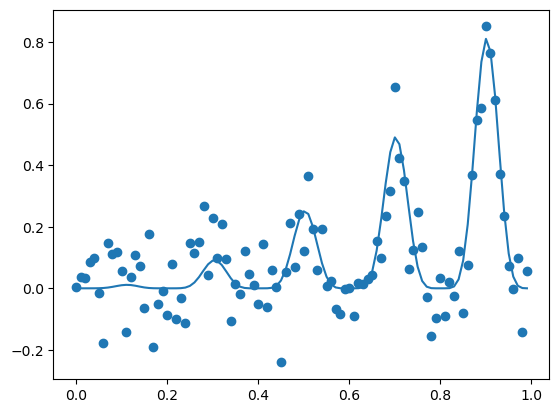

In [4]:
# example of the test problem
from math import sin
from math import pi
from numpy import arange
from numpy import argmax
from numpy.random import normal
from matplotlib import pyplot
# objective function
def objective(x, noise=0.1):
  noise = normal(loc=0, scale=noise)
  return (x**2 * sin(5 * pi * x)**6.0) + noise
# grid-based sample of the domain [0,1]
X = arange(0, 1, 0.01)
# sample the domain without noise
y = [objective(x, 0) for x in X]
# sample the domain with noise
ynoise = [objective(x) for x in X]
# find best result
ix = argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix])) # plot the points with noise
pyplot.scatter(X, ynoise)
# plot the points without noise
pyplot.plot(X, y)
# show the plot
pyplot.show()

## Kullback-Leibler Divergence

#### The Kullback-Leibler Divergence score, or KL divergence score, quantifies how much one probability distribution differs from another probability distribution. The KL divergence between two distributions Q and P is often stated using the following notation:
- K L(P ||Q)